In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')
data = pd.DataFrame(data)
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [2]:
data.head()
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


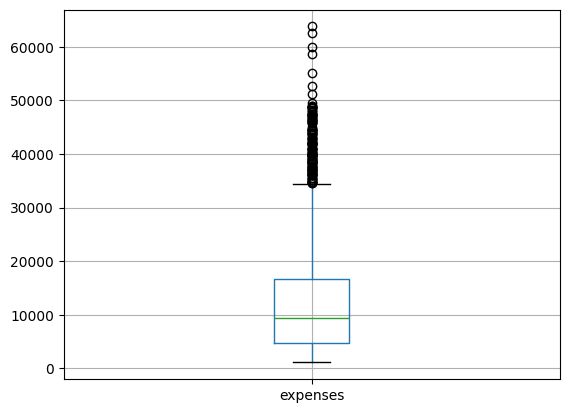

In [3]:
import matplotlib.pyplot as plt

data.boxplot(column='expenses')
plt.show()

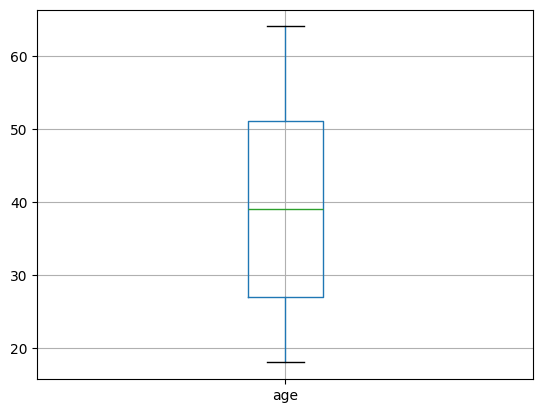

In [4]:
data.boxplot(column='age')
plt.show()

In [5]:
import seaborn as sns
q1_inc = data['expenses'].quantile(0.25)
q3_inc = data['expenses'].quantile(0.75)
iqr_inc = q3_inc - q1_inc
borne_inf_inc = q1_inc - 1.5 * iqr_inc
borne_sup_inc = q3_inc + 1.5 * iqr_inc



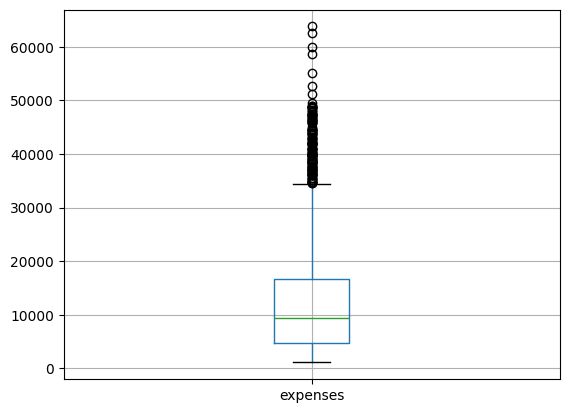

In [6]:
data.boxplot(column='expenses')
plt.show()

In [7]:
import pandas as pd

# Utiliser pd.get_dummies pour encoder les colonnes catégorielles
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Afficher les premières lignes du jeu de données encodé
print(data_encoded.head())


   age   bmi  children  expenses  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.9         0  16884.92        True     False      False        True   
1   18  33.8         1   1725.55       False      True       True       False   
2   28  33.0         3   4449.46       False      True       True       False   
3   33  22.7         0  21984.47       False      True       True       False   
4   32  28.9         0   3866.86       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False  


Root Mean Squared Error (RMSE): 0.09
R^2 (Coefficient de détermination): 0.78
Coefficients:  [[ 1.88671122e-01  5.38354709e-03  6.79411268e-03  1.47806595e-04
  -1.47806595e-04 -1.88753838e-01  1.88753838e-01  7.33558669e-03
   1.42462064e-03 -3.17881910e-03 -5.58138823e-03]]
Intercept:  [0.04665542]


C:\Users\Utilisateur\PycharmProjects\fraismedic\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


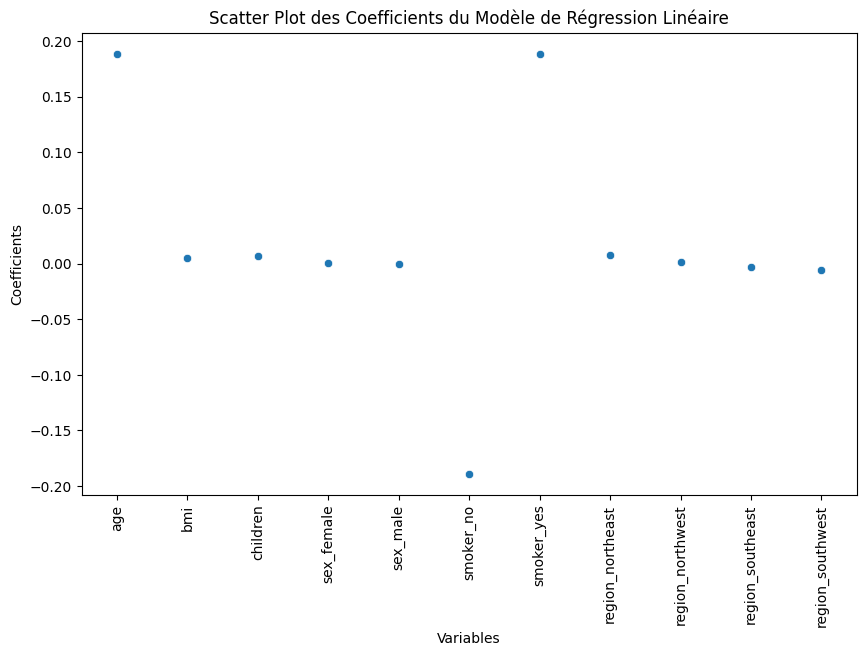

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Sélectionner les variables indépendantes (features) et la variable dépendante (target)
X = data_encoded.drop(columns=['expenses'])  # Variables indépendantes
y = data_encoded['expenses']  # Variable dépendante
# Initialiser les scalers MinMax pour 'age' et 'expenses'
scaler_age = MinMaxScaler()
scaler_expenses = MinMaxScaler()

# Appliquer MinMaxScaler à 'age' et 'expenses' de manière séparée
X['age'] = scaler_age.fit_transform(X[['age']])  # Normaliser la colonne 'age'
y = scaler_expenses.fit_transform(y.values.reshape(-1, 1))  # Normaliser la cible 'expenses'


# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R^2

# Afficher les résultats
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 (Coefficient de détermination): {r2:.2f}")

# Afficher les coefficients de la régression
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
# Afficher les coefficients du modèle sous forme de DataFrame pour les visualiser
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Coefficients du modèle
coefficients = model.coef_

# Si les coefficients sont sous forme d'un tableau 1D, les mettre dans un DataFrame
# pour que chaque coefficient corresponde à une feature
coefficients_df = pd.DataFrame(coefficients.T, columns=['Coefficients'], index=X.columns)

# Affichage du graphique avec un Violin Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coefficients_df.index, y=coefficients_df['Coefficients'])
plt.title('Scatter Plot des Coefficients du Modèle de Régression Linéaire')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)  # Rotation des labels si nécessaire
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R^2

# Afficher les résultats
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 (Coefficient de détermination): {r2:.2f}")

# Afficher les coefficients de la régression
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
# Afficher les coefficients du modèle sous forme de DataFrame pour les visualiser
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Coefficients du modèle
coefficients = model.coef_

# Si les coefficients sont sous forme d'un tableau 1D, les mettre dans un DataFrame
# pour que chaque coefficient corresponde à une feature
coefficients_df = pd.DataFrame(coefficients.T, columns=['Coefficients'], index=X.columns)

# Affichage du graphique avec un Violin Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coefficients_df.index, y=coefficients_df['Coefficients'])
plt.title('Scatter Plot des Coefficients du Modèle de Régression Linéaire')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=90)  # Rotation des labels si nécessaire
plt.show()



In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables indépendantes (sans la cible)
X = data_encoded.drop(columns=['expenses'])

# Normaliser les données (important pour l'ACP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créer et ajuster l'ACP
pca = PCA(n_components=5)  # Vous pouvez choisir le nombre de composantes principales
X_pca = pca.fit_transform(X_scaled)

# Afficher la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante : {pca.explained_variance_ratio_}")
print(f"Variance expliquée cumulée : {pca.explained_variance_ratio_.cumsum()}")

# Créer un DataFrame avec les résultats de l'ACP
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Vérifier la forme du DataFrame et les premières lignes
print(pca_df.shape)  # Cela doit être (1338, 5)
print(pca_df.head())  # Afficher les premières lignes pour vérification

Variance expliquée par chaque composante : [0.19774626 0.16875924 0.14016727 0.12025213 0.12007899]
Variance expliquée cumulée : [0.19774626 0.3665055  0.50667276 0.62692489 0.74700388]
(1338, 5)
        PC1       PC2       PC3       PC4       PC5
0  0.880918  2.817272 -0.755582  1.755652 -1.212895
1  0.821685 -1.308111  1.634063 -0.585614  0.479916
2  0.814232 -1.341520  1.613503 -0.540442  0.240498
3  0.174107 -1.557022 -1.459456 -1.567109 -0.802419
4  0.256429 -1.577199 -0.937435 -1.550932 -0.802776


Meilleurs paramètres trouvés :  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE avec le meilleur modèle : 0.07
R^2 avec le meilleur modèle : 0.87


C:\Users\Utilisateur\PycharmProjects\fraismedic\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


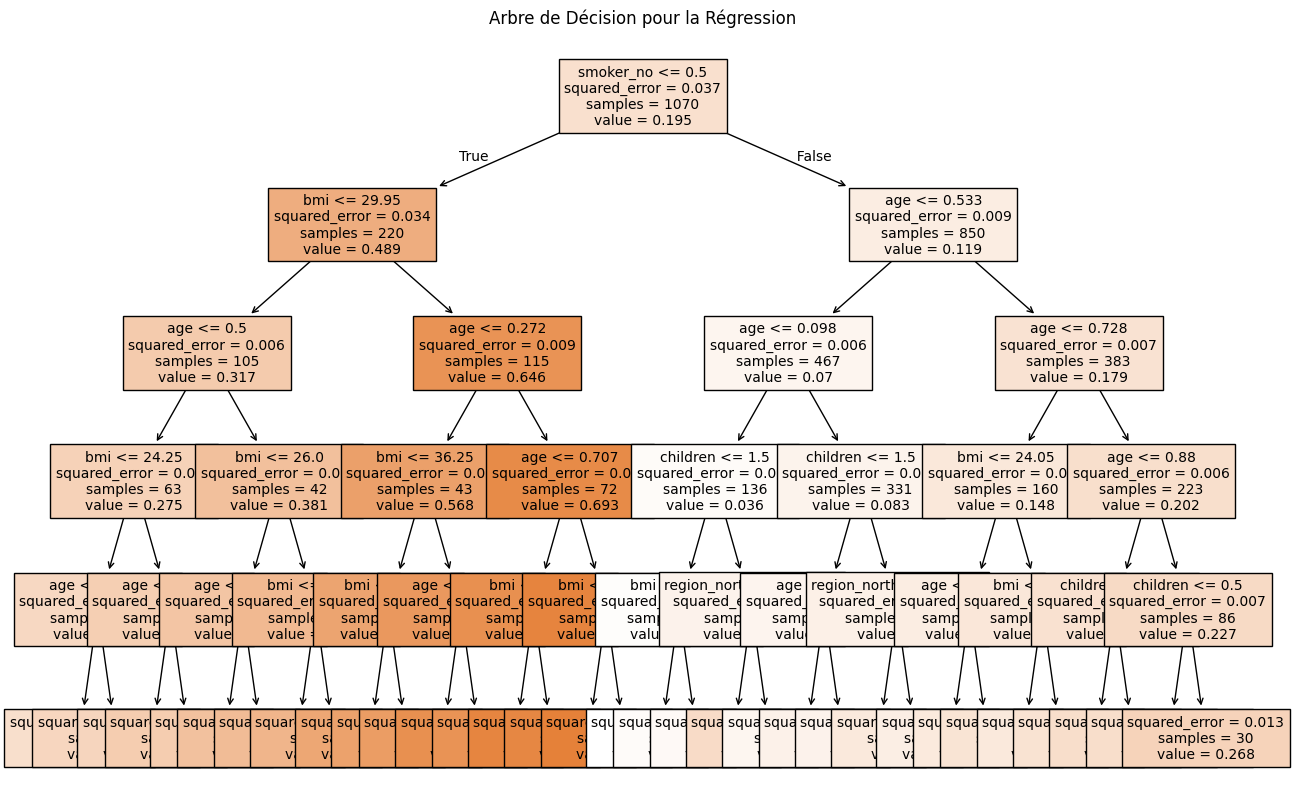

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)

# Appliquer GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Faire des prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print(f"RMSE avec le meilleur modèle : {rmse_best:.2f}")
# Calculer le coefficient de détermination (R^2)
r2_best = r2_score(y_test, y_pred_best)
print(f"R^2 avec le meilleur modèle : {r2_best:.2f}")
# Visualiser l'arbre de décision du meilleur modèle
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, fontsize=10)
plt.title("Arbre de Décision pour la Régression")
plt.show()
